# `Logistic Regression Assignment -----------------------------------`

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [217]:
data = pd.read_csv('heart.csv',sep='\t')   # here separator is \t
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,True,Normal,150,No,2.3,Up_Sloping,0,1,Yes
1,37,Male,non-anginal pain,130,250,False,Not_Normal,187,No,3.5,Up_Sloping,0,2,Yes
2,41,Female,atypical angina,130,204,False,Normal,172,No,1.4,Down_Sloping,0,2,Yes
3,56,Male,atypical angina,120,236,False,Not_Normal,178,No,0.8,Down_Sloping,0,2,Yes
4,57,Female,typical angina,120,354,False,Not_Normal,163,Yes,0.6,Down_Sloping,0,2,Yes


In [218]:
data.shape

(303, 14)

In [219]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [220]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal          int64
target       object
dtype: object

In [221]:
data.isnull().sum()   # bam!! we are lucky

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [222]:
target = 'target'
cont_columns = data.select_dtypes(['int64','float64']).columns
cat_columns = list(filter(lambda x: x!='target',data.select_dtypes('object').columns))

In [223]:
cont_columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

In [224]:
cat_columns

['sex', 'cp', 'restecg', 'exang', 'slope']

### Variables
#### Cat
- sex
- cp
- restecg      
- exang   
- slope   
- target

#### Num
- age
- trestbps      
- thalach
- oldpeak     
- ca            
- thal

## `Univariate Analysis`
### `Categorical Columns`
### sex

In [225]:
data['sex'].value_counts()

Male      207
Female     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

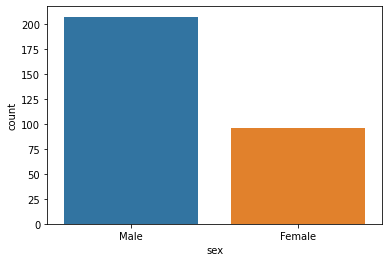

In [226]:
sns.countplot(data['sex'])

### cp

In [227]:
data['cp'].value_counts()

 typical angina      143
 non-anginal pain     87
atypical angina       50
asymptomatic          23
Name: cp, dtype: int64

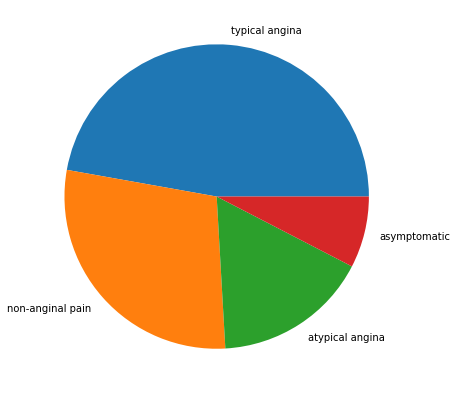

In [228]:
plt.figure(figsize=(10,7))
plt.pie(data['cp'].value_counts(),labels=['typical angina','non-anginal pain','atypical angina','asymptomatic']);

### restecg

In [229]:
data['restecg'].value_counts()

Not_Normal    154
Normal        147
2               2
Name: restecg, dtype: int64

### drop unnecessary entry

In [230]:
data[data['restecg'] == '2']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,55,Female,typical angina,128,205,False,2,130,Yes,2.0,Flat,1,3,No
291,58,Male,typical angina,114,318,False,2,140,No,4.4,Up_Sloping,3,1,No


In [231]:
data.drop(data[data['restecg'] == '2'].index, inplace = True)

In [232]:
data['restecg'].value_counts()

Not_Normal    154
Normal        147
Name: restecg, dtype: int64

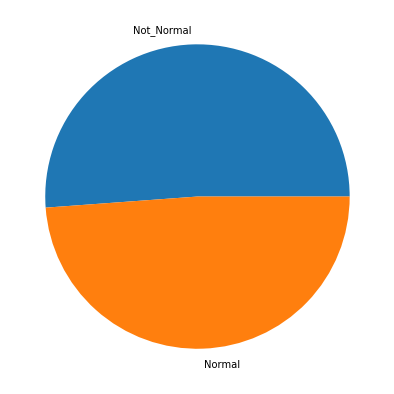

In [233]:
plt.figure(figsize=(10,7))
plt.pie(data['restecg'].value_counts(),labels=['Not_Normal','Normal']);

### exang

In [234]:
data['exang'].value_counts()

No     203
Yes     98
Name: exang, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='count'>

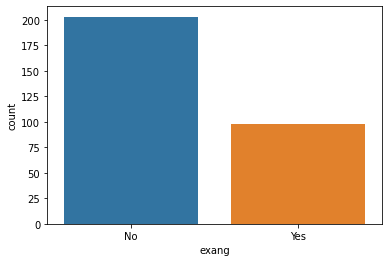

In [235]:
sns.countplot(data['exang'])

### slope

In [236]:
data['slope'].value_counts()

Down_Sloping    142
Flat            139
Up_Sloping       20
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='count'>

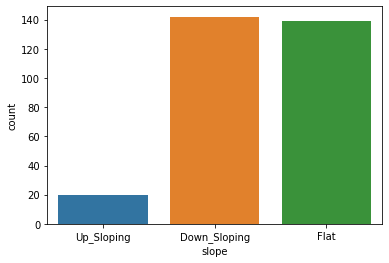

In [237]:
sns.countplot(data['slope'])

### target

In [238]:
data['target'].value_counts()

Yes    165
No     136
Name: target, dtype: int64

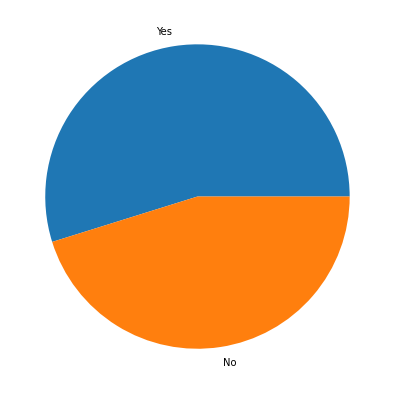

In [239]:
plt.figure(figsize=(10,7))
plt.pie(data['target'].value_counts(),labels=['Yes','No']);

### `Numerical Columns`

In [240]:
cont_columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

### Age

<AxesSubplot:xlabel='age', ylabel='Density'>

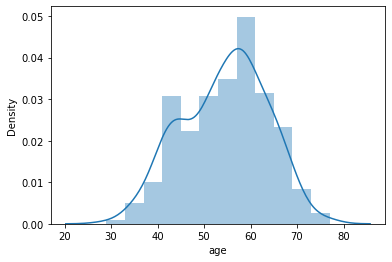

In [241]:
sns.distplot(data['age'])

### trestbps

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

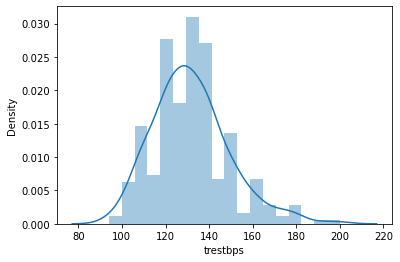

In [242]:
sns.distplot(data['trestbps'])

<AxesSubplot:xlabel='trestbps'>

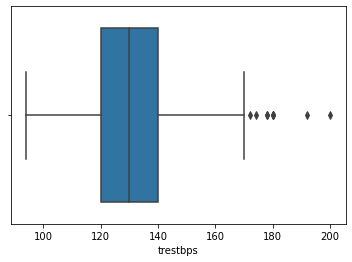

In [243]:
sns.boxplot(data['trestbps'])

### chol

<AxesSubplot:xlabel='chol', ylabel='Density'>

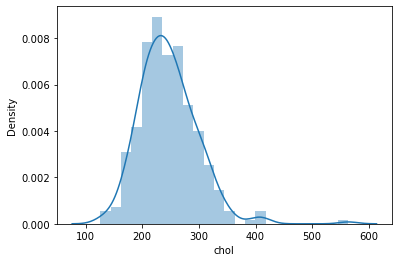

In [244]:
sns.distplot(data['chol'])

<AxesSubplot:xlabel='chol'>

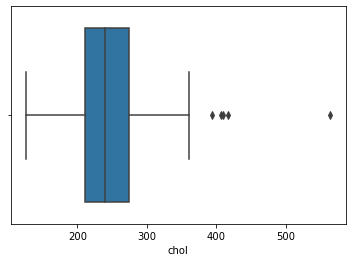

In [245]:
sns.boxplot(data['chol'])

### thalach

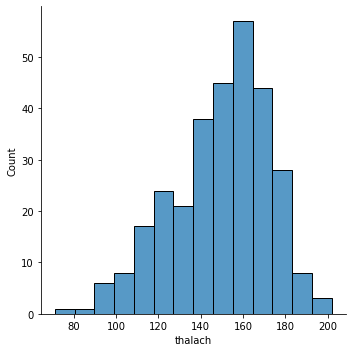

In [246]:
sns.displot(data['thalach'])

In [247]:
data['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

<AxesSubplot:xlabel='thalach'>

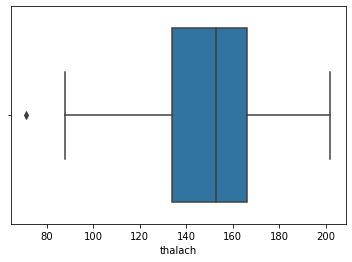

In [248]:
sns.boxplot(data['thalach'])

### oldpeak

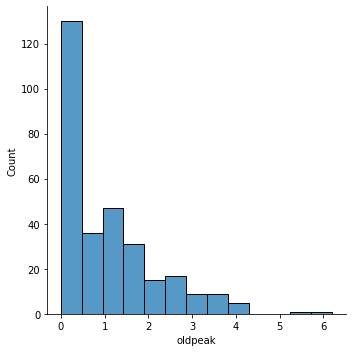

In [249]:
sns.displot(data['oldpeak'])

<AxesSubplot:xlabel='oldpeak'>

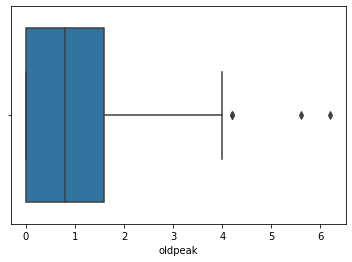

In [250]:
sns.boxplot(data['oldpeak'])

### ca

In [251]:
data['ca'].value_counts()

0    175
1     64
2     38
3     19
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='count'>

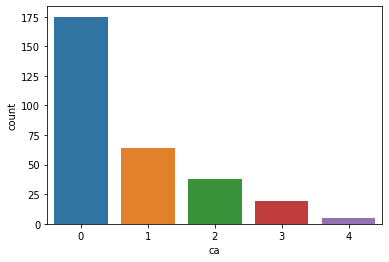

In [252]:
sns.countplot(data['ca'])

### thal

In [253]:
data['thal'].value_counts()

2    166
3    116
1     17
0      2
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

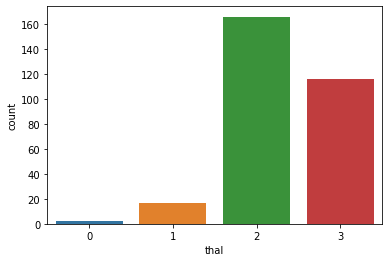

In [254]:
sns.countplot(data['thal'])

## `Bivariate Analysis`

### Variables
#### Cat
- sex
- cp
- restecg      
- exang   
- slope   
- target

#### Num
- age
- trestbps      
- thalach
- oldpeak    
- chol
- ca            
- thal

### `chi square test ------------------------------------`

In [255]:
from scipy.stats import chi2_contingency

def chisq_test(target,independent_col,data):
    two_way = pd.crosstab(data[target],data[independent_col])
    chi_test_result = chi2_contingency(two_way)
    print(f'{independent_col} vs Target => chi-square result p-values => {chi_test_result[1]}')

In [256]:
for col in cat_columns:
    chisq_test(target,col,data)

sex vs Target => chi-square result p-values => 1.2964266836147963e-06
cp vs Target => chi-square result p-values => 3.075704975293786e-17
restecg vs Target => chi-square result p-values => 0.005122688403733478
exang vs Target => chi-square result p-values => 8.056792400494411e-14
slope vs Target => chi-square result p-values => 8.245228911355519e-11


#### `All categorical variables are related to Target`

### `T test --------------------------------------------`

In [257]:
from scipy.stats import ttest_ind

for i in cont_columns:
    target_yes = data.loc[data['target']=='Yes',i]
    target_no = data.loc[data['target']=='No',i]
    ttest_results = ttest_ind(target_yes,target_no)
    print(f'{i} vs Target => {ttest_results}')

age vs Target => Ttest_indResult(statistic=-3.9871055694100876, pvalue=8.413404478817881e-05)
trestbps vs Target => Ttest_indResult(statistic=-2.62699256199571, pvalue=0.009058400662977579)
chol vs Target => Ttest_indResult(statistic=-1.4539157853550697, pvalue=0.1470184875376515)
thalach vs Target => Ttest_indResult(statistic=7.988466100187031, pvalue=2.9812492974359913e-14)
oldpeak vs Target => Ttest_indResult(statistic=-8.125236640959406, pvalue=1.1894673127836083e-14)
ca vs Target => Ttest_indResult(statistic=-7.267164641974141, pvalue=3.214935022563428e-12)
thal vs Target => Ttest_indResult(statistic=-6.5151665570893185, pvalue=3.074540562459003e-10)


#### `All numerical variables except chol are related to Target`

### `Label Encoding`

In [258]:
from sklearn.preprocessing import LabelEncoder

binary = ['sex','fbs','restecg','exang','target']
le = LabelEncoder()
for i in binary:
    data[i] = le.fit_transform(data[i])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,0,150,0,2.3,Up_Sloping,0,1,1
1,37,1,non-anginal pain,130,250,0,1,187,0,3.5,Up_Sloping,0,2,1
2,41,0,atypical angina,130,204,0,0,172,0,1.4,Down_Sloping,0,2,1
3,56,1,atypical angina,120,236,0,1,178,0,0.8,Down_Sloping,0,2,1
4,57,0,typical angina,120,354,0,1,163,1,0.6,Down_Sloping,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,241,0,1,123,1,0.2,Flat,0,3,0
299,45,1,asymptomatic,110,264,0,1,132,0,1.2,Flat,0,3,0
300,68,1,typical angina,144,193,1,1,141,0,3.4,Flat,2,3,0
301,57,1,typical angina,130,131,0,1,115,1,1.2,Flat,1,3,0


### `One hot encoding`

In [259]:
data = pd.get_dummies(data, columns = ['cp', 'slope'])
data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,cp_ non-anginal pain,cp_ typical angina,cp_asymptomatic,cp_atypical angina,slope_Down_Sloping,slope_Flat,slope_Up_Sloping
0,63,1,145,233,1,0,150,0,2.3,0,1,1,0,0,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,2,1,1,0,0,0,0,0,1
2,41,0,130,204,0,0,172,0,1.4,0,2,1,0,0,0,1,1,0,0
3,56,1,120,236,0,1,178,0,0.8,0,2,1,0,0,0,1,1,0,0
4,57,0,120,354,0,1,163,1,0.6,0,2,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,3,0,0,1,0,0,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,3,0,0,0,1,0,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,3,0,0,1,0,0,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,3,0,0,1,0,0,0,1,0


In [260]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'thal', 'target', 'cp_ non-anginal pain',
       'cp_ typical angina', 'cp_asymptomatic', 'cp_atypical angina',
       'slope_Down_Sloping', 'slope_Flat', 'slope_Up_Sloping'],
      dtype='object')

### Split the data into X and y

In [261]:
X = data.drop(['target'],axis=1)
y = data['target']

## `Multicollinearity ---------------------------------------`

In [262]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Categorical columns

In [263]:
cat = X[['cp_ non-anginal pain',
       'cp_ typical angina', 'cp_asymptomatic', 'cp_atypical angina',
       'slope_Down_Sloping', 'slope_Flat', 'slope_Up_Sloping','sex','fbs','exang','restecg']]

In [264]:
cal_vif(cat)

,var,VIF
0,cp_ non-anginal pain,inf
1,cp_ typical angina,inf
2,cp_asymptomatic,inf
3,cp_atypical angina,inf
4,slope_Down_Sloping,inf
5,slope_Flat,inf
6,slope_Up_Sloping,inf
9,exang,1.36
7,sex,1.04
10,restecg,1.04


### drop redundant column values

In [265]:
cat = X[['cp_ non-anginal pain',
       'cp_ typical angina', 'cp_asymptomatic',
       'slope_Down_Sloping', 'slope_Flat', 'sex','fbs','exang','restecg']]

In [266]:
cal_vif(cat)

,var,VIF
1,cp_ typical angina,3.86
4,slope_Flat,3.74
3,slope_Down_Sloping,3.40
5,sex,3.05
0,cp_ non-anginal pain,2.32
8,restecg,2.04
7,exang,2.01
2,cp_asymptomatic,1.36
6,fbs,1.19


### These categorical columns are perfect, without multicollinearity

### Numerical Columns

In [267]:
num = X[cont_columns]

In [268]:
cal_vif(num)

,var,VIF
1,trestbps,56.71
0,age,38.31
3,thalach,31.52
2,chol,24.79
6,thal,15.75
4,oldpeak,2.24
5,ca,1.70


In [269]:
import statsmodels.api as sm
X_num  = sm.add_constant(num)
ols_model = sm.OLS(y,X_num)
ols_model = ols_model.fit()
ols_model.pvalues

const       1.749598e-01
age         4.425918e-01
trestbps    2.295410e-01
chol        5.043931e-01
thalach     1.601356e-07
oldpeak     2.311374e-05
ca          6.648490e-07
thal        2.622417e-06
dtype: float64

### I will not drop any numerical column, because p-value is too low 

In [271]:
X = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal','cp_ non-anginal pain',
       'cp_ typical angina', 'cp_asymptomatic',
       'slope_Down_Sloping', 'slope_Flat', 'sex','fbs','exang','restecg']]
y = data['target']

### Split the data

In [272]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Model

In [273]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [274]:
y_pred = model.predict(X_test)

### `it's coming wrng -----------------------------------------------------`

In [275]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[1.30635645e-02, 9.86936436e-01],
       [5.69013841e-01, 4.30986159e-01],
       [4.35289403e-01, 5.64710597e-01],
       [9.96077345e-01, 3.92265513e-03],
       [2.50628532e-02, 9.74937147e-01],
       [3.99710481e-02, 9.60028952e-01],
       [9.62155540e-03, 9.90378445e-01],
       [3.88464289e-02, 9.61153571e-01],
       [8.75336610e-01, 1.24663390e-01],
       [2.91804953e-01, 7.08195047e-01],
       [2.25721919e-01, 7.74278081e-01],
       [3.52499271e-01, 6.47500729e-01],
       [3.54518643e-02, 9.64548136e-01],
       [8.46688188e-01, 1.53311812e-01],
       [2.21172295e-02, 9.77882771e-01],
       [3.97735032e-02, 9.60226497e-01],
       [3.42807778e-03, 9.96571922e-01],
       [9.58592989e-01, 4.14070113e-02],
       [9.92341673e-01, 7.65832711e-03],
       [8.89704125e-01, 1.10295875e-01],
       [9.44260045e-01, 5.57399548e-02],
       [8.99428255e-01, 1.00571745e-01],
       [9.40141664e-01, 5.98583357e-02],
       [1.32401122e-01, 8.67598878e-01],
       [3.597488

In [276]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')

Confusion matrix =>
 [[20  6]
 [ 7 28]]
Accuracy => 0.7868852459016393
